# Sentiment Analysis - ComfortDelGro

In this notebook, we will perform sentiment analysis on datasets from ComfortDelGro. Sources of the dataset include:
- Google Play Store
- Reddit
- Twitter

Our approach will be:
1. Obtain all datasets concerning Grab
2. Performing sentiment analysis using vader
3. Visualising the results of our sentiment analysis over time

In [1]:
# Base
import pandas as pd
import numpy as np
import glob, os, re, string
from datetime import datetime

# Graphs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud

# NLTK
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Language Detector
from polyglot.detect import Detector

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Preparation

In [2]:
df = pd.read_csv('data/ca_cleaned/cdg_consolidated.csv')
df['date'] = pd.to_datetime(df['date'])
df.iloc[np.r_[0:10, -10:0]]

,Unnamed: 0,date,comment,source
0,0,2018-11-03,Horrible experience. waited 8mins for the cab ...,gplay
1,1,2018-11-02,Can be better. Please benchmark to Grab to get...,gplay
2,2,2018-11-01,Not so good,gplay
3,3,2018-10-31,Good one,gplay
4,4,2018-10-29,Unable to use app. SMS OTP not delivered (Mala...,gplay
5,5,2018-10-29,Easy to use,gplay
6,6,2018-10-26,Good app.,gplay
7,7,2018-10-24,It s not easy to use,gplay
8,8,2018-10-23,This app not working with Samsung S7. I try to...,gplay
9,9,2018-10-22,Great app to rely on when grab is having ridic...,gplay


In [3]:
df.shape

(3715, 4)

In [4]:
df.dtypes

Unnamed: 0             int64
date          datetime64[ns]
comment               object
source                object
dtype: object

## Sentiment Analysis

We will perform sentiment analysis on the comments. In this case, we will use vader to help us perform sentiment analysis on the comments. More readings on how sentiment analysis can be performed are available at:

- https://opensourceforu.com/2016/12/analysing-sentiments-nltk/
- http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

In [5]:
def analyse_sentiment_vader(df, col_name):
    sid = SentimentIntensityAnalyzer()
    vader = lambda text: sid.polarity_scores(text)
    
    df['vader'] = df[col_name].apply(vader)
    df = pd.merge(df, df['vader'].apply(pd.Series), left_index=True, right_index=True)
    return df.drop(['vader'], axis=1)

In [6]:
df = analyse_sentiment_vader(df, 'comment')
df.iloc[np.r_[0:10, -10:0]]

,Unnamed: 0,date,comment,source,neg,neu,pos,compound
0,0,2018-11-03,Horrible experience. waited 8mins for the cab ...,gplay,0.496,0.504,0.000,-0.8964
1,1,2018-11-02,Can be better. Please benchmark to Grab to get...,gplay,0.000,0.532,0.468,0.9042
2,2,2018-11-01,Not so good,gplay,0.567,0.433,0.000,-0.3865
3,3,2018-10-31,Good one,gplay,0.000,0.256,0.744,0.4404
4,4,2018-10-29,Unable to use app. SMS OTP not delivered (Mala...,gplay,0.000,1.000,0.000,0.0000
5,5,2018-10-29,Easy to use,gplay,0.000,0.408,0.592,0.4404
6,6,2018-10-26,Good app.,gplay,0.000,0.256,0.744,0.4404
7,7,2018-10-24,It s not easy to use,gplay,0.376,0.624,0.000,-0.3412
8,8,2018-10-23,This app not working with Samsung S7. I try to...,gplay,0.000,1.000,0.000,0.0000
9,9,2018-10-22,Great app to rely on when grab is having ridic...,gplay,0.151,0.602,0.247,0.3818


### Average Sentiment - Across All Platforms

In [7]:
df_period = df[df['date'] >= '2018-01-01']

In [8]:
def common_graph_plot(ylabel,ylim_low,ylim_hi,title,grid=False):
    # Initialisation
    fig, ax = plt.subplots()
    fig.set_dpi(300)
    
    # Settings
    ax.set_ylim(ylim_low,ylim_hi)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    ax.xaxis.set_tick_params(rotation=270)

    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel(ylabel)

    if grid:
        ax.grid()
    
    return fig, ax

In [9]:
def plot_sentiment(df,title):
    fig, ax = common_graph_plot('Sentiment',0,1,title)
    
    x = df.index
    
    ax.plot_date(x, df['pos'], color='g', markersize=2)
    ax.plot_date(x, df['neg'], color='r', markersize=2)
    ax.plot_date(x, df['neu'], color='b', markersize=2)

    ax.legend()

    plt.show()

In [10]:
def plot_curve_fitting(df):
    x = df.index
    y = df['compound']
    
    x_dates = mdates.date2num(x)
    p3 = np.poly1d(np.polyfit(x_dates, y, 3))
    xx = np.linspace(x_dates.min(), x_dates.max(), len(x))
    return x_dates, p3(xx)

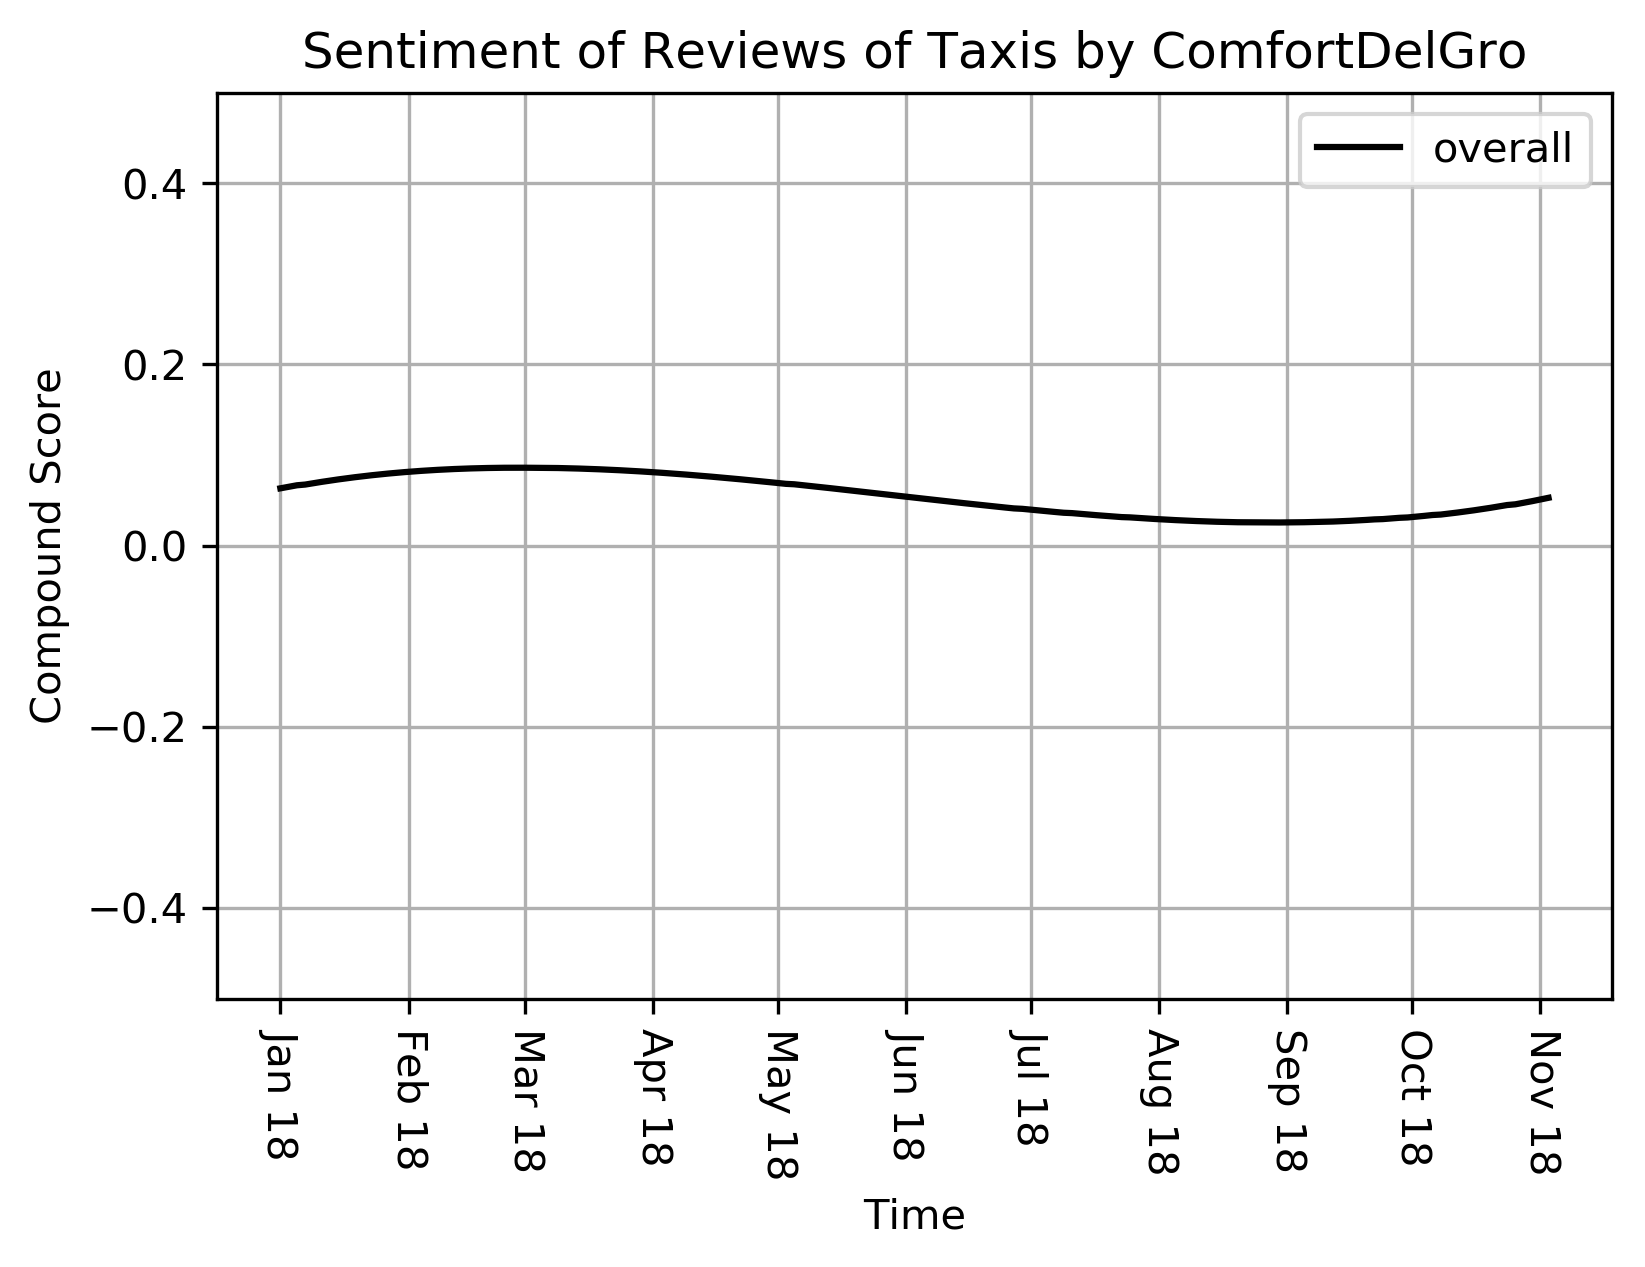

In [11]:
fig, ax = common_graph_plot('Compound Score',-0.5, 0.5, \
              'Sentiment of Reviews of Taxis by ComfortDelGro', True)

avg_sentiment = df_period.groupby(['date']).mean()

x_dates, curve = plot_curve_fitting(avg_sentiment)
ax.plot(x_dates, curve, 'black',label='overall')

ax.legend()
plt.show()

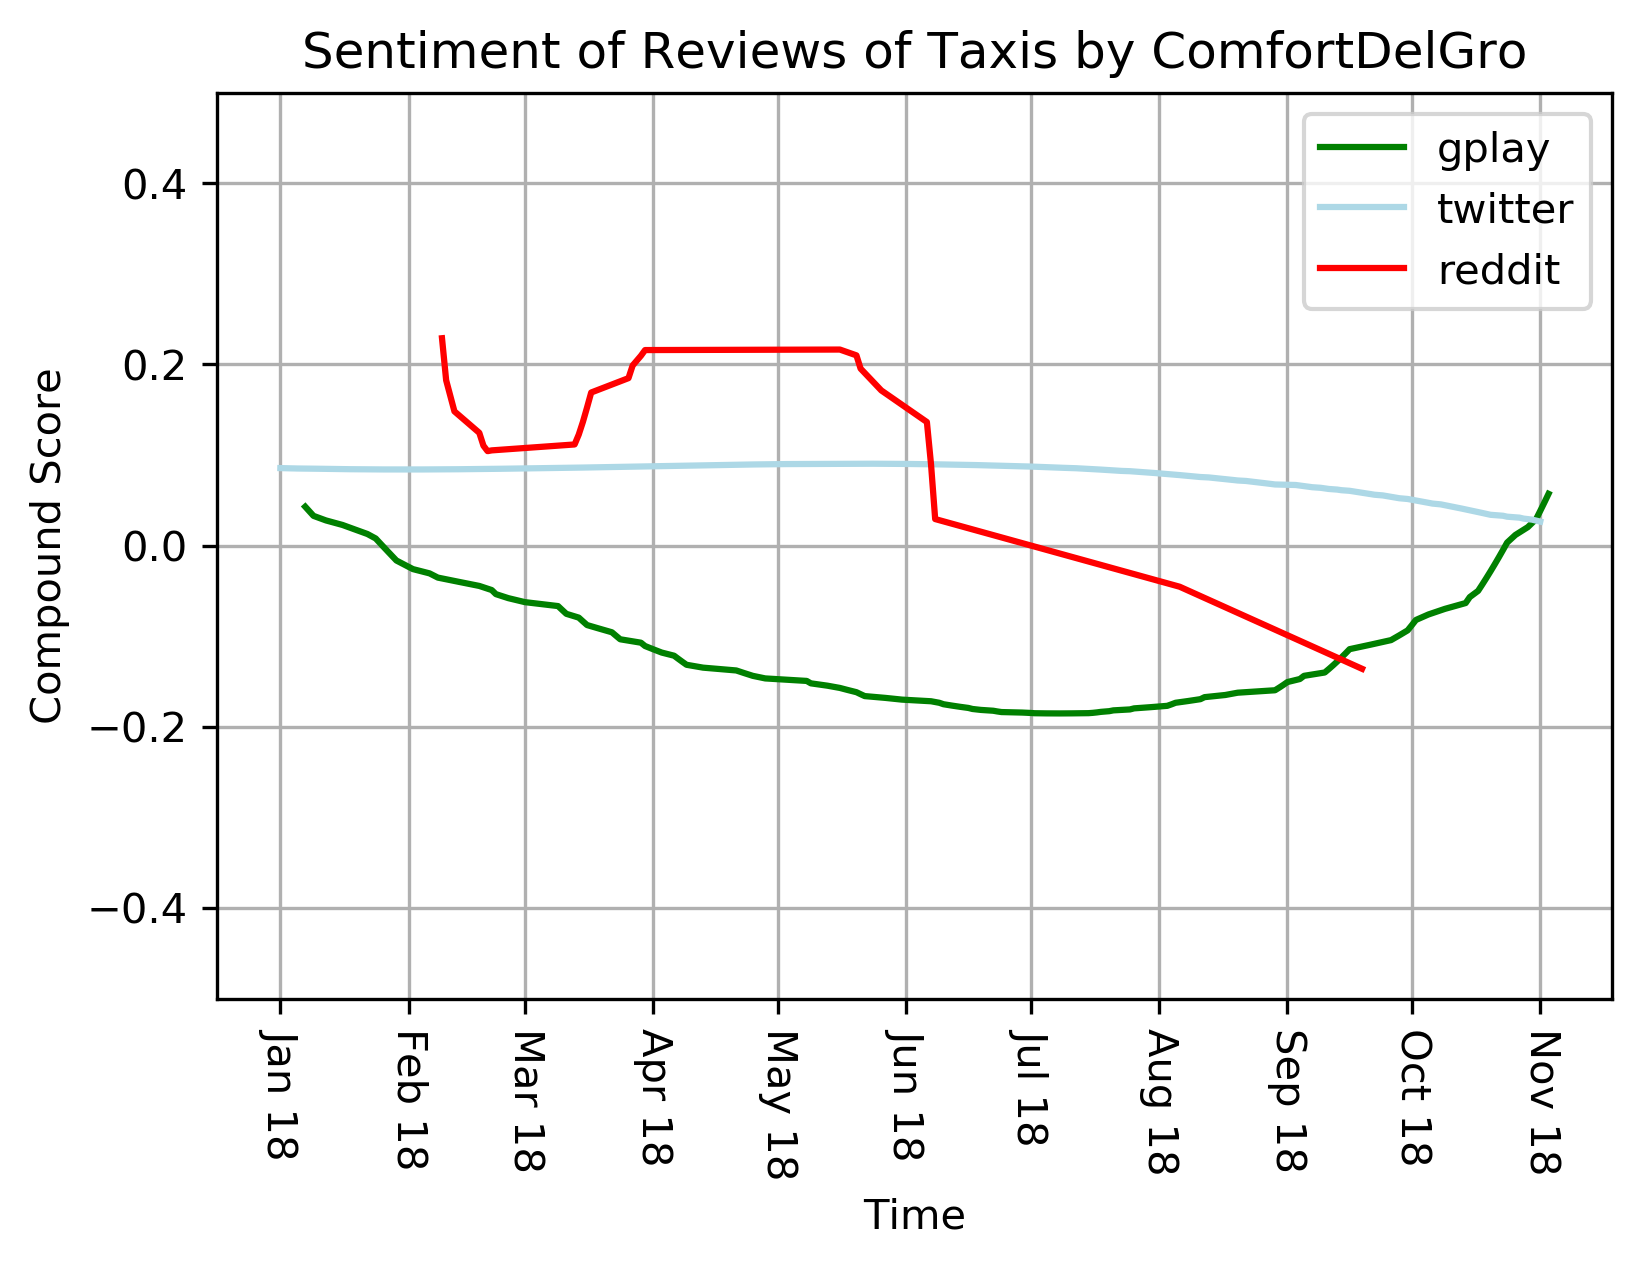

In [12]:
fig, ax = common_graph_plot('Compound Score',-0.5, 0.5, \
              'Sentiment of Reviews of Taxis by ComfortDelGro', True)

colors = ['green','lightblue','red']
for i, platform in enumerate(df_period['source'].unique()):
    dfp = df_period[df_period['source'] == platform]
    avg_sentiment_p = dfp.groupby(['date']).mean()
    
    x_dates, curve = plot_curve_fitting(avg_sentiment_p)
    ax.plot(x_dates, curve, colors[i],label=platform.lower())

ax.legend()
plt.show()

With regards to taxis, specifically ComfortDelGro, the sentiment fell throughout much of 2017 before levelling close to neutral in 2018. The fall in sentiment in 2017 likely is quite likely due to the many promo codes Grab issued to its users. However, it will be premature to conclude just that, as the scatter in 2017 looks very dispersed between the positives and negatives.

There was a slight improvement in terms of the sentiment in 2018, especially in April, about a month after the Grab-Uber merger.

## Limitations of the Analysis

TBC